### Assignment-02

1. What is the distribution of accident severity levels?

In [5]:
df['Severity'].value_counts(normalize=True) * 100

Severity
2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: proportion, dtype: float64

2. How is the accident frequency distributed by hour of the day?

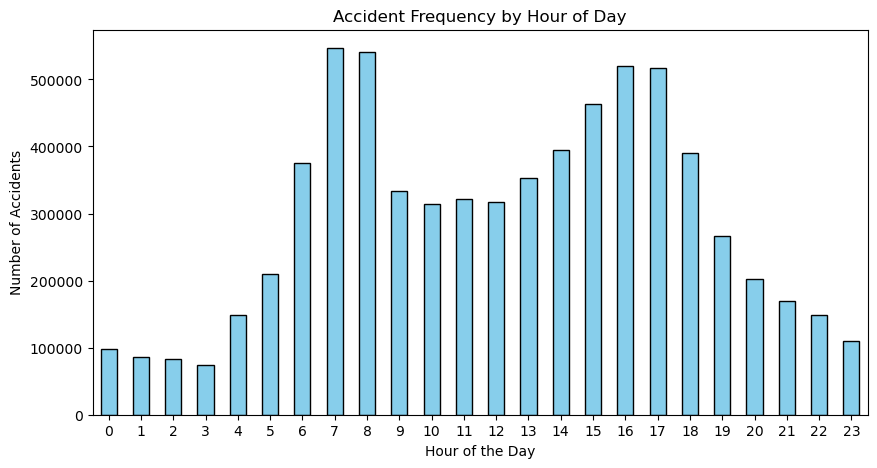

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Accident Frequency by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

3. Which days of the week have the highest number of accidents?

<Axes: xlabel='DayOfWeek'>

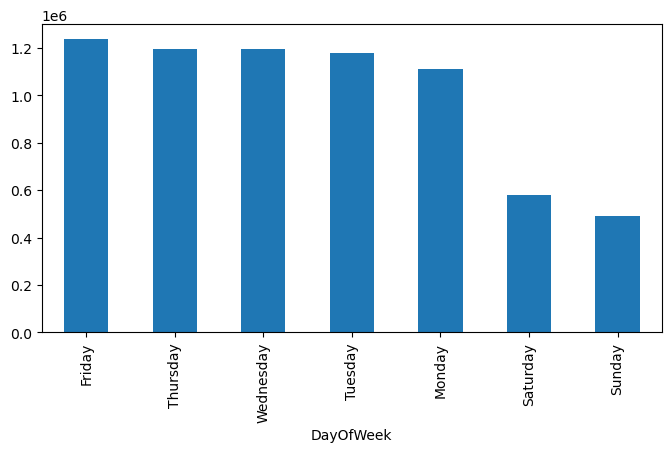

In [8]:
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['DayOfWeek'].value_counts().plot(kind='bar', figsize=(8,4))

4. What are the most common weather conditions during accidents?

In [9]:
df['Weather_Condition'].value_counts().head(10)

Weather_Condition
Fair                2206054
Mostly Cloudy        923515
Clear                808231
Cloudy               715030
Partly Cloudy        635456
Overcast             382802
Light Rain           322207
Scattered Clouds     204782
Light Snow           112300
Fog                   88488
Name: count, dtype: int64

5. How to identify columns with missing data and their missing percentage?

In [10]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
pd.DataFrame({'Missing Values': missing_data, 'Missing %': missing_percent})

,Missing Values,Missing %
ID,0,0.000000
Source,0,0.000000
Severity,0,0.000000
Start_Time,0,0.000000
End_Time,0,0.000000
Start_Lat,0,0.000000
Start_Lng,0,0.000000
End_Lat,3402762,48.713686
End_Lng,3402762,48.713686
Distance(mi),0,0.000000


6. How to impute missing numerical values with median?

In [18]:
print("Before:", df['Temperature(F)'].isnull().sum())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
print("After:", df['Temperature(F)'].isnull().sum())

Before: 0
After: 0


7. How to impute missing categorical values with the mode?

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(cat_cols)[:10], "...")
print("\nMissing counts BEFORE imputation (categorical):")
print(df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum() > 0])
for col in cat_cols:
    if df[col].isnull().sum() > 0: 
        mode_val = df[col].mode().iloc[0]
        df[col] = df[col].fillna(mode_val)
print("\nMissing counts AFTER imputation (categorical):")
print(df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum() > 0])

Categorical columns: ['ID', 'Source', 'End_Time', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country'] ...

Missing counts BEFORE imputation (categorical):
Description                   5
Street                     8474
City                        226
Zipcode                    1677
Timezone                   6785
Airport_Code              19152
Weather_Timestamp        106209
Wind_Direction           153449
Weather_Condition        155462
Sunrise_Sunset            17560
Civil_Twilight            17560
Nautical_Twilight         17560
Astronomical_Twilight     17560
dtype: int64

Missing counts AFTER imputation (categorical):
Series([], dtype: int64)


8. How to label encode a categorical column?

In [21]:
df['Weather_Condition_Label'] = df['Weather_Condition'].astype('category').cat.codes
print(df[['Weather_Condition', 'Weather_Condition_Label']].head(10))

  Weather_Condition  Weather_Condition_Label
0        Light Rain                       61
1        Light Rain                       61
2          Overcast                       87
3     Mostly Cloudy                       84
4     Mostly Cloudy                       84
5        Light Rain                       61
6          Overcast                       87
7          Overcast                       87
8     Mostly Cloudy                       84
9        Light Rain                       61


9. How to one-hot encode a categorical column?

In [22]:
df_encoded = pd.get_dummies(df, columns=['Weather_Condition'], prefix='Weather')
print(df_encoded.head())

    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  ...  \
0 -84.058723  36.274205 -89.630647          0.01  ...   
1 -82.831184  36.274205 -89.630647          0.01  ...   
2 -84.032608  36.274205 -89.630647          0.01  ...   
3 -84.205582  36.274205 -89.630647          0.01  ...   
4 -84.188354  36.274205 -89.630647          0.01  ...   

  Weather_Thunder in the Vicinity Weather_Thunderstorm  \
0                           False                False   
1                           False                False